In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.applications.mobilenet import preprocess_input

import matplotlib.pyplot as plt
%matplotlib inline

from mobilenet import get_mobilenet

Using TensorFlow backend.


In [3]:
data_dir = '/home/ubuntu/data/'

In [4]:
data_generator = ImageDataGenerator(
    data_format='channels_last',
    preprocessing_function=preprocess_input
)

train_generator = data_generator.flow_from_directory(
    data_dir + 'train', 
    target_size=(224, 224),
    batch_size=64
)

val_generator = data_generator.flow_from_directory(
    data_dir + 'val', shuffle=False,
    target_size=(224, 224),
    batch_size=64
)

Found 25600 images belonging to 256 classes.
Found 5120 images belonging to 256 classes.


# Model

In [5]:
model = get_mobilenet(224, alpha=0.25, weight_decay=1e-5, dropout=0.1)
model.count_params()

284336

# Training

In [6]:
model.compile(
    optimizer=optimizers.SGD(lr=1e-2, momentum=0.9, nesterov=True), 
    loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [7]:
model.fit_generator(
    train_generator, 
    steps_per_epoch=400, epochs=30, verbose=1,
    callbacks=[
        ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=2, epsilon=0.007),
        EarlyStopping(monitor='val_acc', patience=4, min_delta=0.01)
    ],
    validation_data=val_generator, validation_steps=80, workers=4
)

Epoch 1/30
400/400 [==============================] - 24s - loss: 3.9156 - acc: 0.2379 - top_k_categorical_accuracy: 0.4393 - val_loss: 2.5220 - val_acc: 0.4686 - val_top_k_categorical_accuracy: 0.7375
Epoch 2/30
400/400 [==============================] - 23s - loss: 2.2534 - acc: 0.5200 - top_k_categorical_accuracy: 0.7672 - val_loss: 1.9509 - val_acc: 0.5574 - val_top_k_categorical_accuracy: 0.8055
Epoch 3/30
400/400 [==============================] - 23s - loss: 1.8197 - acc: 0.5913 - top_k_categorical_accuracy: 0.8228 - val_loss: 1.7527 - val_acc: 0.5898 - val_top_k_categorical_accuracy: 0.8256
Epoch 4/30
400/400 [==============================] - 23s - loss: 1.6057 - acc: 0.6363 - top_k_categorical_accuracy: 0.8502 - val_loss: 1.6489 - val_acc: 0.6090 - val_top_k_categorical_accuracy: 0.8389
Epoch 5/30
400/400 [==============================] - 23s - loss: 1.4687 - acc: 0.6618 - top_k_categorical_accuracy: 0.8668 - val_loss: 1.5938 - val_acc: 0.6188 - val_top_k_categorical_accurac

# Loss/epoch plots

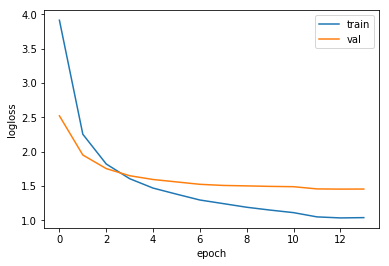

In [8]:
plt.plot(model.history.history['loss'], label='train');
plt.plot(model.history.history['val_loss'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('logloss');

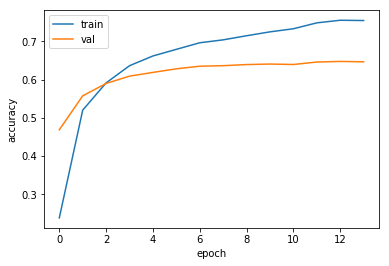

In [9]:
plt.plot(model.history.history['acc'], label='train');
plt.plot(model.history.history['val_acc'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');

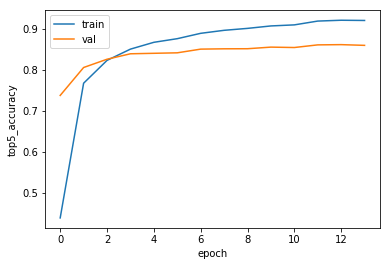

In [10]:
plt.plot(model.history.history['top_k_categorical_accuracy'], label='train');
plt.plot(model.history.history['val_top_k_categorical_accuracy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('top5_accuracy');

# Results

In [11]:
model.evaluate_generator(val_generator, 80)

[1.4546428885310889, 0.646484375, 0.859375]